In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
trainbog=pd.read_csv("/Users/sandip/Data/Analytic_vidhya/BoG/train_zsTMYVA/train.csv")
testbog=pd.read_csv("/Users/sandip/Data/Analytic_vidhya/BoG/test.csv")

In [3]:
featuresold=["NO_OF_Accs","dependents","C_prev1","D_prev1",'MC1','MD1','BalanceM1','BalanceM2','BalanceM3',
          'BalanceM4','BalanceM5','BalanceM6','count_C_prev1','count_C_prev2','count_C_prev3','count_C_prev4',
          'count_C_prev5','count_C_prev6','I_AQB_PrevQ1','I_AQB_PrevQ2','I_NRV_PrevQ1','I_NRV_PrevQ2','Percent_Change_in_Credits']
catfeatureold=["HNW_CATEGORY","FINAL_WORTH_prev1","ENGAGEMENT_TAG_prev1","OCCUP_ALL_NEW"]

In [4]:
features=["Responders","NO_OF_Accs","dependents","MonthlyCredit1","MonthlyCredit2","MonthlyCredit3","MonthlyCredit4",
         "MonthlyCredit5","MonthlyCredit6",'CNR_prev1','BAL_prev1','CNR_prev2','BAL_prev2','CNR_prev3','BAL_prev3','CNR_prev4',
          'BAL_prev4','CNR_prev5','BAL_prev5','CNR_prev6','BAL_prev6','Recency_of_CR_TXN','Recency_of_Activity','L_PREM','L_CLOS'
          ,'L_ACTIVE','CASH_WD_CNT_Last6','I_AQB_PrevQ1','I_AQB_PrevQ2','I_NRV_PrevQ1','I_NRV_PrevQ2','Percent_Change_in_Credits']
          
catfeature=["HNW_CATEGORY","FINAL_WORTH_prev1","ENGAGEMENT_TAG_prev1",'RBI_Class_Audit',"OCCUP_ALL_NEW"]

In [5]:
Testfeatures=["NO_OF_Accs","dependents","MonthlyCredit1","MonthlyCredit2","MonthlyCredit3","MonthlyCredit4",
         "MonthlyCredit5","MonthlyCredit6",'CNR_prev1','BAL_prev1','CNR_prev2','BAL_prev2','CNR_prev3','BAL_prev3'
              ,'CNR_prev4','BAL_prev4','CNR_prev5','BAL_prev5','CNR_prev6','BAL_prev6','Recency_of_CR_TXN'
              ,'Recency_of_Activity', 'L_PREM','L_CLOS' ,'L_ACTIVE','CASH_WD_CNT_Last6','I_AQB_PrevQ1','I_AQB_PrevQ2','I_NRV_PrevQ1','I_NRV_PrevQ2','Percent_Change_in_Credits'
          ]
catfeature=["HNW_CATEGORY","FINAL_WORTH_prev1","ENGAGEMENT_TAG_prev1",'RBI_Class_Audit',"OCCUP_ALL_NEW"]

In [6]:
trainbog["NO_OF_Accs"].loc[trainbog['NO_OF_Accs']>5] = 5
trainbog["dependents"].loc[trainbog['dependents']>5] = 5

In [7]:
trainbog[['EMAIL_UNSUBSCRIBE']]=trainbog[['EMAIL_UNSUBSCRIBE']].fillna('N')
trainbog[['OCCUP_ALL_NEW']]=trainbog[['OCCUP_ALL_NEW']].fillna('MISSING')
trainbog[['dependents']]=trainbog[['dependents']].fillna(5)
trainbog[['FINAL_WORTH_prev1']]=trainbog[['FINAL_WORTH_prev1']].fillna('MEDIUM')
trainbog[['ENGAGEMENT_TAG_prev1']]=trainbog[['ENGAGEMENT_TAG_prev1']].fillna('LOW')
trainbog[['Recency_of_CR_TXN']]=trainbog[['Recency_of_CR_TXN']].fillna(-1)

In [7]:
#trainbog.C_prev1.value_counts()
y=trainbog.loc[trainbog["C_prev1"]==1]

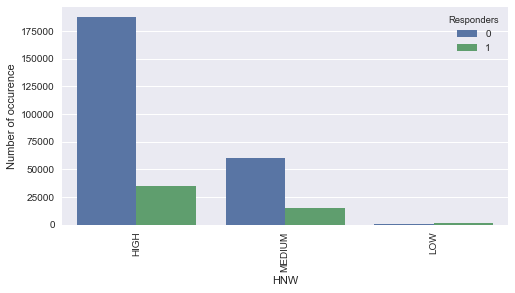

In [35]:
cnt_srs=trainbog.HNW_CATEGORY.value_counts()
plt.figure(figsize=(8,4))
sns.countplot(data=trainbog,x="FINAL_WORTH_prev1",hue='Responders')
plt.xticks( rotation='vertical')
plt.ylabel("Number of occurence")
plt.xlabel('HNW')
plt.show()

In [8]:
trainbog["C_prev1"].loc[trainbog['C_prev1']>3435235] = 3435235
trainbog["D_prev1"].loc[trainbog['D_prev1']>3455025] = 3455025

In [92]:
np.percentile(trainbog.D_prev1,99)

3455025.8300000243

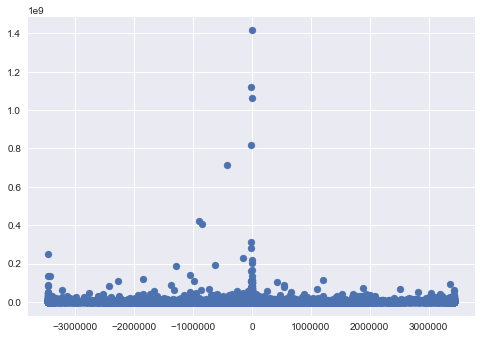

In [181]:
plt.scatter(trainbog.BalanceM1.values,trainbog.BAL_prev1.values)
plt.show()

In [9]:
trainbog["MC1"]=trainbog['C_prev1']/trainbog['count_C_prev1']
trainbog["MD1"]=trainbog['D_prev1']/trainbog['count_D_prev1']

In [10]:
trainbog['BalanceM1'] = trainbog['C_prev1']-trainbog['D_prev1']
trainbog['BalanceM2'] = trainbog['C_prev2']-trainbog['D_prev2']
trainbog['BalanceM3'] = trainbog['C_prev3']-trainbog['D_prev3']
trainbog['BalanceM4'] = trainbog['C_prev4']-trainbog['D_prev4']
trainbog['BalanceM5'] = trainbog['C_prev5']-trainbog['D_prev5']
trainbog['BalanceM6'] = trainbog['C_prev6']-trainbog['D_prev6']

In [11]:
trainbog['MonthlyCredit1']= trainbog['C_prev1']/trainbog['count_C_prev1']
trainbog['MonthlyCredit2']= trainbog['C_prev2']/trainbog['count_C_prev2']
trainbog['MonthlyCredit3']= trainbog['C_prev3']/trainbog['count_C_prev3']
trainbog['MonthlyCredit4']= trainbog['C_prev4']/trainbog['count_C_prev4']
trainbog['MonthlyCredit5']= trainbog['C_prev5']/trainbog['count_C_prev5']
trainbog['MonthlyCredit6']= trainbog['C_prev6']/trainbog['count_C_prev6']
trainbog[['MonthlyCredit1']]=trainbog[['MonthlyCredit1']].fillna(0)
trainbog[['MonthlyCredit2']]=trainbog[['MonthlyCredit2']].fillna(0)
trainbog[['MonthlyCredit3']]=trainbog[['MonthlyCredit3']].fillna(0)
trainbog[['MonthlyCredit4']]=trainbog[['MonthlyCredit4']].fillna(0)
trainbog[['MonthlyCredit5']]=trainbog[['MonthlyCredit5']].fillna(0)
trainbog[['MonthlyCredit6']]=trainbog[['MonthlyCredit6']].fillna(0)
trainbog[['Recency_of_Activity']]=trainbog[['Recency_of_Activity']].fillna(-1)

In [23]:
trainbog.AL_CNC_PREM_CLOSED_PREVQ1.value_counts()

1.0    86
Name: AL_CNC_PREM_CLOSED_PREVQ1, dtype: int64

In [14]:
def isLoanActive(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,u,v,w):
    if(pd.notnull(a)):
        return 1
    elif(pd.notnull(b)):
        return 1
    elif(pd.notnull(c)):
        return 1
    elif(pd.notnull(d)):
        return 1
    elif(pd.notnull(e)):
        return 1
    elif(pd.notnull(f)):
        return 1
    elif(pd.notnull(g)):
        return 1
    elif(pd.notnull(h)):
        return 1
    elif(pd.notnull(i)):
        return 1
    elif(pd.notnull(j)):
        return 1
    elif(pd.notnull(k)):
        return 1
    elif(pd.notnull(l)):
        return 1
    elif(pd.notnull(m)):
        return 1
    elif(pd.notnull(n)):
        return 1
    elif(pd.notnull(o)):
        return 1
    elif(pd.notnull(p)):
        return 1
    elif(pd.notnull(q)):
        return 1
    elif(pd.notnull(s)):
        return 1
    elif(pd.notnull(r)):
        return 1
    elif(pd.notnull(u)):
        return 1
    elif(pd.notnull(v)):
        return 1
    elif(pd.notnull(w)):
        return 1
    else:
        return 0

In [15]:
trainbog["L_PREM"]=trainbog.apply(lambda x : isLoanPremClosed(x['AGRI_PREM_CLOSED_PREVQ1'],x['AL_CNC_PREM_CLOSED_PREVQ1'],
                                                           x['AL_PREM_CLOSED_PREVQ1'],x['BL_PREM_CLOSED_PREVQ1'],x['CC_PREM_CLOSED_PREVQ1'],
                                                            x['CE_PREM_CLOSED_PREVQ1'],x['CV_PREM_CLOSED_PREVQ1'],x['EDU_PREM_CLOSED_PREVQ1'],
                                                            x['OTHER_LOANS_PREM_CLOSED_PREVQ1'],x['PL_PREM_CLOSED_PREVQ1'],
                                                            x['RD_PREM_CLOSED_PREVQ1'],x['FD_PREM_CLOSED_PREVQ1'],
                                                           x['TL_PREM_CLOSED_PREVQ1'],x['TWL_PREM_CLOSED_PREVQ1']),axis=1)

In [16]:
trainbog["L_CLOS"]=trainbog.apply(lambda x : isLoanPremClosed(x['AGRI_Closed_PrevQ1'],x['AL_CNC_Closed_PrevQ1'],
                                                           x['AL_Closed_PrevQ1'],x['BL_Closed_PrevQ1'],x['CC_CLOSED_PREVQ1'],
                                                            x['CE_Closed_PrevQ1'],x['CV_Closed_PrevQ1'],x['EDU_Closed_PrevQ1'],
                                                            x['OTHER_LOANS_Closed_PrevQ1'],x['PL_Closed_PrevQ1'],
                                                            x['RD_CLOSED_PREVQ1'],x['FD_CLOSED_PREVQ1'],
                                                           x['TL_Closed_PrevQ1'],x['TWL_Closed_PrevQ1']),axis=1)

In [17]:
trainbog["L_ACTIVE"]=trainbog.apply(lambda x : isLoanActive(x['AGRI_TAG_LIVE'],x['AL_CNC_TAG_LIVE'],x['AL_TAG_LIVE'],
                                                                x['BL_TAG_LIVE'],x['CC_TAG_LIVE'],x['CE_TAG_LIVE'],x['CV_TAG_LIVE'],x['DEMAT_TAG_LIVE'],x['EDU_TAG_LIVE'],x['GL_TAG_LIVE'],x['HL_TAG_LIVE'],x['SEC_ACC_TAG_LIVE'],x['INS_TAG_LIVE'],x['LAS_TAG_LIVE'],x['MF_TAG_LIVE'],x['OTHER_LOANS_TAG_LIVE'],x['PL_TAG_LIVE'],x['RD_TAG_LIVE'],x['FD_TAG_LIVE'],x['TL_TAG_LIVE'],x['TWL_TAG_LIVE'],x['lap_tag_live']),axis=1)



In [20]:
trainCat=trainbog[catfeature]

In [21]:
trainNew= trainbog[features]

In [113]:
train.isnull().sum(axis=0).sort_values(ascending=False).head(50)

21                     0
20                     0
Recency_of_Activity    0
Recency_of_CR_TXN      0
BAL_prev6              0
CNR_prev6              0
BAL_prev5              0
CNR_prev5              0
BAL_prev4              0
CNR_prev4              0
BAL_prev3              0
CNR_prev3              0
BAL_prev2              0
CNR_prev2              0
BAL_prev1              0
CNR_prev1              0
MonthlyCredit6         0
MonthlyCredit5         0
MonthlyCredit4         0
MonthlyCredit3         0
MonthlyCredit2         0
MonthlyCredit1         0
dependents             0
L_PREM                 0
L_CLOS                 0
L_ACTIVE               0
10                     0
19                     0
18                     0
17                     0
16                     0
15                     0
14                     0
13                     0
12                     0
11                     0
9                      0
Responders             0
8                      0
7                      0


In [22]:
encoded_x = None
for i in range(0, trainCat.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(trainCat.iloc[:,i])
    feature = feature.reshape(trainCat.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

X shape: :  (300000, 22)


In [100]:
trainCat.columns.tolist()

['HNW_CATEGORY',
 'FINAL_WORTH_prev1',
 'ENGAGEMENT_TAG_prev1',
 'RBI_Class_Audit',
 'OCCUP_ALL_NEW']

In [23]:
p=pd.DataFrame(encoded_x)

In [102]:
p.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
frame=[trainNew,p]
train=pd.concat(frame,axis=1)

In [376]:
train=trainNew

In [361]:
train.head()

,Responders,NO_OF_Accs,dependents,MonthlyCredit1,MonthlyCredit2,MonthlyCredit3,MonthlyCredit4,MonthlyCredit5,MonthlyCredit6,CNR_prev1,...,CNR_prev5,BAL_prev5,CNR_prev6,BAL_prev6,Recency_of_CR_TXN,Recency_of_Activity,L_PREM,L_CLOS,L_ACTIVE,CASH_WD_CNT_Last6
0,0,1,0.0,0.000,0.0,0.0,0.000000,7800.0,0.0,1520.75,...,2557.22,1223508.20,1752.89,841385.39,147.0,4.0,0,0,0,1
1,0,1,0.0,1599.200,0.0,0.0,0.000000,0.0,28.5,18340.86,...,12807.07,6053779.08,17711.99,8684104.76,19.0,3.0,0,0,1,1
2,1,1,5.0,15000.000,0.0,0.0,296000.000000,36300.0,0.0,482.92,...,32.12,46987.35,58.83,28240.31,0.0,1.0,0,0,0,1
3,0,1,0.0,0.000,0.0,0.0,0.000000,0.0,0.0,2045.09,...,2029.79,856120.91,2011.19,839849.98,-1.0,5.0,0,0,0,0
4,0,1,0.0,105725.295,29800.0,29800.0,29933.333333,24900.0,26600.0,713.13,...,26.95,30086.96,89.59,65139.84,0.0,1.0,0,0,1,0


In [25]:
X = train.iloc[:,1:train.shape[1]]
y = train.iloc[:,0]

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [27]:
#model = XGBClassifier()
model = xgb.XGBClassifier(missing=np.nan, max_depth=7, n_estimators=700, learning_rate=0.03,
                          nthread=4, subsample=0.8, colsample_bytree=0.8, seed=4242)
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4242,
       silent=True, subsample=0.8)


In [28]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.67%


In [327]:
X_test.shape[1]

47

In [29]:
testbog["NO_OF_Accs"].loc[testbog['NO_OF_Accs']>5] = 5
testbog["dependents"].loc[testbog['dependents']>5] = 5
testbog[['EMAIL_UNSUBSCRIBE']]=testbog[['EMAIL_UNSUBSCRIBE']].fillna('N')
testbog[['OCCUP_ALL_NEW']]=testbog[['OCCUP_ALL_NEW']].fillna('MISSING')
testbog[['dependents']]=testbog[['dependents']].fillna(5)
testbog[['FINAL_WORTH_prev1']]=testbog[['FINAL_WORTH_prev1']].fillna('MEDIUM')
testbog[['ENGAGEMENT_TAG_prev1']]=testbog[['ENGAGEMENT_TAG_prev1']].fillna('LOW')
testbog[['Recency_of_CR_TXN']]=testbog[['Recency_of_CR_TXN']].fillna(-1)
testbog["C_prev1"].loc[testbog['C_prev1']>3435235] = 3435235
testbog["D_prev1"].loc[testbog['D_prev1']>3455025] = 3455025
testbog['MonthlyCredit1']= testbog['C_prev1']/testbog['count_C_prev1']
testbog['MonthlyCredit2']= testbog['C_prev2']/testbog['count_C_prev2']
testbog['MonthlyCredit3']= testbog['C_prev3']/testbog['count_C_prev3']
testbog['MonthlyCredit4']= testbog['C_prev4']/testbog['count_C_prev4']
testbog['MonthlyCredit5']= testbog['C_prev5']/testbog['count_C_prev5']
testbog['MonthlyCredit6']= testbog['C_prev6']/testbog['count_C_prev6']
testbog[['MonthlyCredit1']]=testbog[['MonthlyCredit1']].fillna(0)
testbog[['MonthlyCredit2']]=testbog[['MonthlyCredit2']].fillna(0)
testbog[['MonthlyCredit3']]=testbog[['MonthlyCredit3']].fillna(0)
testbog[['MonthlyCredit4']]=testbog[['MonthlyCredit4']].fillna(0)
testbog[['MonthlyCredit5']]=testbog[['MonthlyCredit5']].fillna(0)
testbog[['MonthlyCredit6']]=testbog[['MonthlyCredit6']].fillna(0)
testbog[['Recency_of_Activity']]=testbog[['Recency_of_Activity']].fillna(-1)

In [30]:
testbog["L_PREM"]=testbog.apply(lambda x : isLoanPremClosed(x['AGRI_PREM_CLOSED_PREVQ1'],x['AL_CNC_PREM_CLOSED_PREVQ1'],
                                                           x['AL_PREM_CLOSED_PREVQ1'],x['BL_PREM_CLOSED_PREVQ1'],x['CC_PREM_CLOSED_PREVQ1'],
                                                            x['CE_PREM_CLOSED_PREVQ1'],x['CV_PREM_CLOSED_PREVQ1'],x['EDU_PREM_CLOSED_PREVQ1'],
                                                            x['OTHER_LOANS_PREM_CLOSED_PREVQ1'],x['PL_PREM_CLOSED_PREVQ1'],
                                                            x['RD_PREM_CLOSED_PREVQ1'],x['FD_PREM_CLOSED_PREVQ1'],
                                                           x['TL_PREM_CLOSED_PREVQ1'],x['TWL_PREM_CLOSED_PREVQ1']),axis=1)

In [31]:
testbog["L_CLOS"]=testbog.apply(lambda x : isLoanPremClosed(x['AGRI_Closed_PrevQ1'],x['AL_CNC_Closed_PrevQ1'],
                                                           x['AL_Closed_PrevQ1'],x['BL_Closed_PrevQ1'],x['CC_CLOSED_PREVQ1'],
                                                            x['CE_Closed_PrevQ1'],x['CV_Closed_PrevQ1'],x['EDU_Closed_PrevQ1'],
                                                            x['OTHER_LOANS_Closed_PrevQ1'],x['PL_Closed_PrevQ1'],
                                                            x['RD_CLOSED_PREVQ1'],x['FD_CLOSED_PREVQ1'],
                                                           x['TL_Closed_PrevQ1'],x['TWL_Closed_PrevQ1']),axis=1)

In [32]:
testbog["L_ACTIVE"]=testbog.apply(lambda x : isLoanActive(x['AGRI_TAG_LIVE'],x['AL_CNC_TAG_LIVE'],x['AL_TAG_LIVE'],
                                                                x['BL_TAG_LIVE'],x['CC_TAG_LIVE'],x['CE_TAG_LIVE'],x['CV_TAG_LIVE'],x['DEMAT_TAG_LIVE'],x['EDU_TAG_LIVE'],x['GL_TAG_LIVE'],x['HL_TAG_LIVE'],x['SEC_ACC_TAG_LIVE'],x['INS_TAG_LIVE'],x['LAS_TAG_LIVE'],x['MF_TAG_LIVE'],x['OTHER_LOANS_TAG_LIVE'],x['PL_TAG_LIVE'],x['RD_TAG_LIVE'],x['FD_TAG_LIVE'],x['TL_TAG_LIVE'],x['TWL_TAG_LIVE'],x['lap_tag_live']),axis=1)



In [34]:
testCat=testbog[catfeature]

In [35]:
testNew= testbog[Testfeatures]

In [36]:
Tencoded_x = None
for i in range(0, testCat.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(testCat.iloc[:,i])
    feature = feature.reshape(testCat.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if Tencoded_x is None:
        Tencoded_x = feature
    else:
        Tencoded_x = np.concatenate((Tencoded_x, feature), axis=1)
print("X shape: : ", Tencoded_x.shape)

X shape: :  (200000, 22)


In [37]:
t=pd.DataFrame(Tencoded_x)
Tframe=[testNew,t]
testF=pd.concat(Tframe,axis=1)

In [390]:
testF=testNew

In [387]:
testF.columns.tolist


<bound method Index.tolist of Index(['NO_OF_Accs', 'dependents', 'MonthlyCredit1', 'MonthlyCredit2',
       'MonthlyCredit3', 'MonthlyCredit4', 'MonthlyCredit5', 'MonthlyCredit6',
       'CNR_prev1', 'BAL_prev1', 'CNR_prev2', 'BAL_prev2', 'CNR_prev3',
       'BAL_prev3', 'CNR_prev4', 'BAL_prev4', 'CNR_prev5', 'BAL_prev5',
       'CNR_prev6', 'BAL_prev6', 'Recency_of_CR_TXN', 'Recency_of_Activity',
       'L_PREM', 'L_CLOS', 'L_ACTIVE', 'CASH_WD_CNT_Last6'],
      dtype='object')>

In [38]:
predictions=model.predict_proba(testF)[:,1]

In [39]:
submission = pd.DataFrame({
        "UCIC_ID": testbog["UCIC_ID"],
        "Responders": predictions
    })
submission.to_csv('/Users/sandip/Data/Analytic_vidhya/BoG/bog7.csv', index=False)

In [162]:
predictions

array([ 0.30039424,  0.07392243,  0.04346601, ...,  0.16159827,
        0.05698766,  0.39742959], dtype=float32)

[  4.19891207e-03   8.81158561e-03   3.27637717e-02   3.24266329e-02
   3.24113108e-02   2.92391386e-02   3.19668986e-02   3.23500112e-02
   5.67466095e-02   8.70124921e-02   4.54371311e-02   7.91357011e-02
   4.15906832e-02   6.73051849e-02   3.73611227e-02   4.42418195e-02
   3.52156907e-02   4.39966284e-02   4.30924818e-02   5.54440282e-02
   3.90161686e-02   4.02421281e-02   2.49789283e-03   2.62048887e-03
   2.97295232e-03   3.64723010e-03   3.21814418e-03   4.81189182e-03
   8.62769131e-03   2.02283356e-03   4.18358762e-03   5.45552047e-03
   6.75810268e-03   3.80047504e-03   0.00000000e+00   5.01111010e-03
   1.67037011e-03   3.11087281e-03   3.23346863e-03   3.20281973e-03
   2.06880691e-03   1.07271473e-04   3.06489928e-05   1.53244962e-03
   3.18749528e-03   3.60125653e-03   2.62048887e-03]


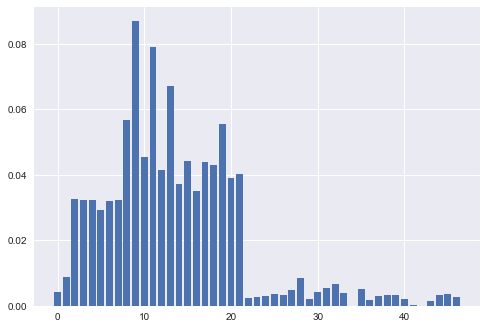

In [176]:
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

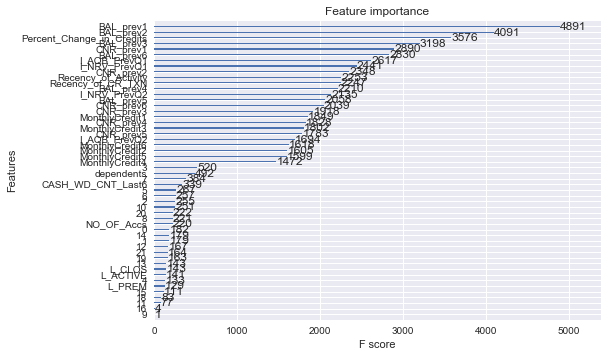

In [40]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [192]:
dd1=trainbog.loc[trainbog["FD_PREM_CLOSED_PREVQ1"].notnull()]


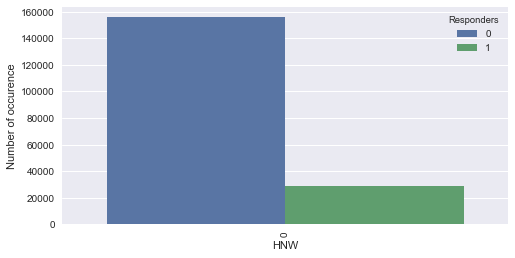

In [210]:
plt.figure(figsize=(8,4))
sns.countplot(data=dd1,x="CASH_WD_CNT_Last6",hue='Responders')
plt.xticks( rotation='vertical')
plt.ylabel("Number of occurence")
plt.xlabel('HNW')
plt.show()

In [337]:
trainbog.Recency_of_DR_TXN.value_counts()

0.0      36775
3.0      15367
4.0      12213
1.0      11859
2.0      10950
5.0      10825
6.0       9058
7.0       7387
9.0       6042
11.0      5546
10.0      5490
12.0      5287
13.0      5282
21.0      5015
14.0      4876
24.0      4327
17.0      3804
18.0      3579
19.0      3360
20.0      3239
8.0       2955
25.0      2633
23.0      2515
28.0      2421
27.0      2374
26.0      2351
33.0      1889
30.0      1834
31.0      1811
32.0      1748
         ...  
162.0       46
155.0       46
198.0       46
204.0       44
218.0       43
225.0       37
232.0       32
239.0       27
274.0       27
334.0       25
351.0       23
267.0       22
344.0       22
246.0       22
260.0       22
309.0       21
281.0       21
323.0       21
337.0       19
330.0       18
253.0       18
360.0       16
316.0       16
302.0       16
358.0       16
295.0       12
288.0       11
321.0       11
365.0       11
366.0        2
Name: Recency_of_DR_TXN, Length: 367, dtype: int64

In [354]:
dd2=trainbog.loc[trainbog["Recency_of_Activity"]<8]
#dd1=dd2.loc[dd2["CASH_WD_AMT_Last6"]<5.0]
dd2.Responders.value_counts()

0    100190
1     27025
Name: Responders, dtype: int64

In [358]:
testbog["Recency_of_Activity"].loc[(testbog['Recency_of_Activity']<4)] = 1
testbog["Recency_of_Activity"].loc[(testbog['Recency_of_Activity']<10) & (testbog['Recency_of_Activity']>4)] = 2
testbog["Recency_of_Activity"].loc[(testbog['Recency_of_Activity']<25) & (testbog['Recency_of_Activity']>10)] = 3
testbog["Recency_of_Activity"].loc[(testbog['Recency_of_Activity']<75) & (testbog['Recency_of_Activity']>25)] = 4
testbog["Recency_of_Activity"].loc[(testbog['Recency_of_Activity']<365) & (testbog['Recency_of_Activity']>75)] = 5
testbog["Recency_of_Activity"].loc[ (testbog['Recency_of_Activity']>365)] = 6

In [357]:
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<4)] = 1
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<10) & (trainbog['Recency_of_Activity']>4)] = 2
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<25) & (trainbog['Recency_of_Activity']>10)] = 3
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<75) & (trainbog['Recency_of_Activity']>25)] = 4
trainbog["Recency_of_Activity"].loc[(trainbog['Recency_of_Activity']<365) & (trainbog['Recency_of_Activity']>75)] = 5
trainbog["Recency_of_Activity"].loc[ (trainbog['Recency_of_Activity']>365)] = 6

In [222]:
np.percentile(cf,100)

184811.0

In [264]:
xc=trainbog.CASH_WD_AMT_Last6.values
np.percentile(xc,99)

665001.00000000093

In [371]:
trainbog.Percent_Change_in_Credits.value_counts()

 0.000000        4594
-50.000000        677
-33.333333        662
 100.000000       517
 50.000000        450
-66.666667        302
-25.000000        260
 200.000000       215
 33.333333        194
 150.000000       162
 300.000000       158
-60.000000        158
-40.000000        152
 66.666667        139
-20.000000        139
 400.000000       137
-75.000000        133
 25.000000        124
 20.000000        111
-80.000000        104
-16.666667        100
 500.000000        76
 900.000000        72
 40.000000         68
-10.000000         67
-42.857143         66
 60.000000         66
-70.000000         64
-83.333333         63
-37.500000         63
                 ... 
-12.229283          1
-37.905481          1
 0.397580           1
 35.464484          1
 3.105048           1
 155.609938         1
-23.105858          1
-64.730290          1
 350.320167         1
 4454.535420        1
-97.481953          1
 0.581661           1
 1861.111111        1
 26.010151          1
 369.96398

In [18]:
trainbog['CASH_WD_CNT_Last6'].loc[trainbog['CASH_WD_CNT_Last6']>1] = 1

In [33]:
testbog['CASH_WD_CNT_Last6'].loc[testbog['CASH_WD_CNT_Last6']>1] = 1